# Wikidata predicate distribution analysis

In this notebook we'll analyse how wikidata properties are distributed. We will try to investigate the property distribution of some towns and possibly other entities

In [ ]:
from tools.datasets import *

glasgow_truthy_dict = fetch_dataset("Q4093", provider="wikidata", flavor="simple")

In [2]:
predicates = glasgow_truthy_dict["entities"]["Q4093"]["claims"]

print(predicates.keys())

dict_keys(['P190', 'P131', 'P373', 'P227', 'P17', 'P94', 'P281', 'P421', 'P473', 'P300', 'P625', 'P31', 'P613', 'P910', 'P948', 'P982', 'P646', 'P1082', 'P901', 'P1036', 'P856', 'P1464', 'P1465', 'P1566', 'P1740', 'P1792', 'P605', 'P206', 'P935', 'P214', 'P47', 'P1997', 'P2633', 'P1281', 'P242', 'P2046', 'P1343', 'P1255', 'P268', 'P906', 'P998', 'P2468', 'P1617', 'P3616', 'P3120', 'P3417', 'P2347', 'P1225', 'P3219', 'P4527', 'P1549', 'P6', 'P2716', 'P1889', 'P5573', 'P949', 'P4672', 'P1151', 'P1667', 'P18', 'P1830', 'P1376', 'P244', 'P1705', 'P1448', 'P2936', 'P1296', 'P691', 'P6766', 'P6849', 'P7350', 'P836', 'P7867', 'P7818', 'P7829', 'P7827', 'P7832', 'P7859', 'P7959', 'P1417', 'P6404'])


In [15]:


def get_edges(entity_df):
    """Generate triples: [<subject>, <predicate>, <object>].
        Only consider objects for which there is a linked entity"""
    
    root = entity_df["entities"]
    subjects = list(entity_df["entities"].keys())
    
    predicates = [(subject, claim, root[subject]["claims"][claim]) for subject in subjects for claim in root[subject]["claims"]]

    tuples = []
    
    for (subject, claim, snaks) in predicates:
        for snak in snaks:
            mainsnak = snak["mainsnak"]
            if mainsnak["snaktype"] == "value" and mainsnak["datavalue"]["type"] == "wikibase-entityid":
                tuples.append((subject, claim, mainsnak["datavalue"]["value"]["id"]))
            
    
    return tuples

edges = get_edges(glasgow_truthy_dict)
for edge in edges:
    print(edge)

('Q4093', 'P190', 'Q5776')
('Q4093', 'P190', 'Q2090')
('Q4093', 'P190', 'Q23482')
('Q4093', 'P190', 'Q908')
('Q4093', 'P190', 'Q495')
('Q4093', 'P190', 'Q1563')
('Q4093', 'P190', 'Q11739')
('Q4093', 'P190', 'Q216479')
('Q4093', 'P131', 'Q55934339')
('Q4093', 'P131', 'Q68826097')
('Q4093', 'P131', 'Q77606319')
('Q4093', 'P131', 'Q77607750')
('Q4093', 'P17', 'Q145')
('Q4093', 'P17', 'Q174193')
('Q4093', 'P17', 'Q161885')
('Q4093', 'P17', 'Q230791')
('Q4093', 'P421', 'Q6574')
('Q4093', 'P31', 'Q515')
('Q4093', 'P31', 'Q1549591')
('Q4093', 'P910', 'Q6789903')
('Q4093', 'P1464', 'Q8050662')
('Q4093', 'P1465', 'Q9218504')
('Q4093', 'P1740', 'Q8458102')
('Q4093', 'P1792', 'Q6791290')
('Q4093', 'P206', 'Q19721')
('Q4093', 'P206', 'Q183161')
('Q4093', 'P47', 'Q2746326')
('Q4093', 'P47', 'Q209142')
('Q4093', 'P2633', 'Q5535147')
('Q4093', 'P1343', 'Q4114391')
('Q4093', 'P1343', 'Q4173137')
('Q4093', 'P1343', 'Q19180675')
('Q4093', 'P1343', 'Q602358')
('Q4093', 'P6', 'Q29973504')
('Q4093', 'P1889

In [4]:
results_df = wikidata_sparql.run_query("""
SELECT ?label
WHERE
{
    wd:Q4093 rdfs:label ?label.
    FILTER(LANG(?label) = "en").
}
""")

In [5]:
results_df[['label.value']].head()

,label.value
0,Glasgow


In [8]:
# let's generalize
annotate_wikidata_property(["P6", "P10"])


,property.type,property.value,propertyLabel.xml:lang,propertyLabel.type,propertyLabel.value
0,uri,http://www.wikidata.org/entity/P6,en,literal,head of government
1,uri,http://www.wikidata.org/entity/P10,en,literal,video


In [19]:
import pandas as pd
edges_df = pd.DataFrame(edges, columns=["subject", "predicate", "object"])

In [22]:
edges_df.groupby("predicate")["object"].count()

predicate
P1151    1
P131     4
P1343    4
P1376    3
P1464    1
P1465    1
P17      4
P1740    1
P1792    1
P1830    2
P1889    1
P190     8
P206     2
P2633    1
P2936    1
P31      2
P421     1
P47      2
P6       1
P7867    1
P7959    3
P910     1
Name: object, dtype: int64

In [28]:
property_list = edges_df["predicate"].unique()
properties = annotate_wikidata_property(property_list)

In [31]:
properties["predicate"] = properties["property.value"].str[len("http://www.wikidata.org/entity/"):]

In [43]:
annotated_edges = edges_df.merge(properties, left_on="predicate", right_on="predicate")

annotated_edges[["subject", "predicate", "propertyLabel.value"]]

,subject,predicate,propertyLabel.value
0,Q4093,P190,twinned administrative body
1,Q4093,P190,twinned administrative body
2,Q4093,P190,twinned administrative body
3,Q4093,P190,twinned administrative body
4,Q4093,P190,twinned administrative body
5,Q4093,P190,twinned administrative body
6,Q4093,P190,twinned administrative body
7,Q4093,P190,twinned administrative body
8,Q4093,P131,located in the administrative territorial entity
9,Q4093,P131,located in the administrative territorial entity


In [47]:
glasgow_property_distribution = annotated_edges.pivot_table(index=['subject', 'predicate', 'propertyLabel.value'], aggfunc='size')

In [49]:
import matplotlib.pyplot as plt

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7feb71ec98d0>],
      dtype=object)

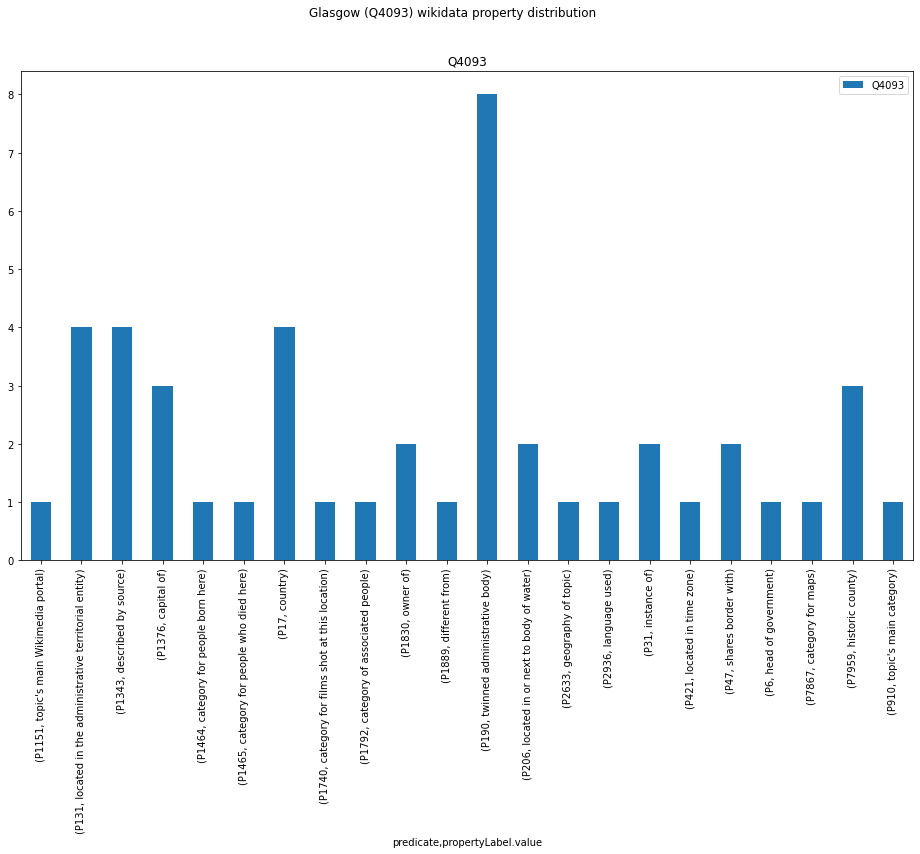

In [64]:
glasgow_property_distribution.unstack(level=0).plot(kind='bar', subplots=True, title="Glasgow (Q4093) wikidata property distribution", figsize=(16, 9))

In [77]:
def strip_prefix(prefix, string):
    if string.startswith(prefix):
        return string[len(prefix):]
    return string

def find_wikidata_entity(entity_str):
    query = """SELECT ?entity
    WHERE
    {
        ?entity rdfs:label "?entity_str"@en.
    }
    
    LIMIT 1
    """.replace("?entity_str", entity_str)
    
    result = wikidata_sparql.run_query(query)["entity.value"][0]
    
    return strip_prefix("http://www.wikidata.org/entity/", result)

find_wikidata_entity("Glasgow")

'Q4093'

In [97]:
def get_entities_distribution(entities):
    wikidata_truthy_dfs = [fetch_dataset(entity, provider="wikidata", flavor="simple") for entity in entities]
    edges_list = [get_edges(df) for df in wikidata_truthy_dfs]
    edges = [edge for edges in edges_list for edge in edges]
    edges_df = pd.DataFrame(edges, columns=["subject", "predicate", "object"])
    
    property_list = edges_df["predicate"].unique()
    properties = annotate_wikidata_property(property_list)
    
    properties["predicate"] = properties["property.value"].str[len("http://www.wikidata.org/entity/"):]
    annotated_edges = edges_df.merge(properties, left_on="predicate", right_on="predicate")
    
    property_distribution = annotated_edges.pivot_table(index=['subject', 'predicate', 'propertyLabel.value'], aggfunc='size')
    
    return property_distribution

def plot_distribution(property_distribution):
    property_distribution.unstack(level=0).plot(kind='bar', subplots=False, figsize=(30, 9))

Dataset Q4093.json already downloaded. Skipping...
Dataset Q42.json already downloaded. Skipping...


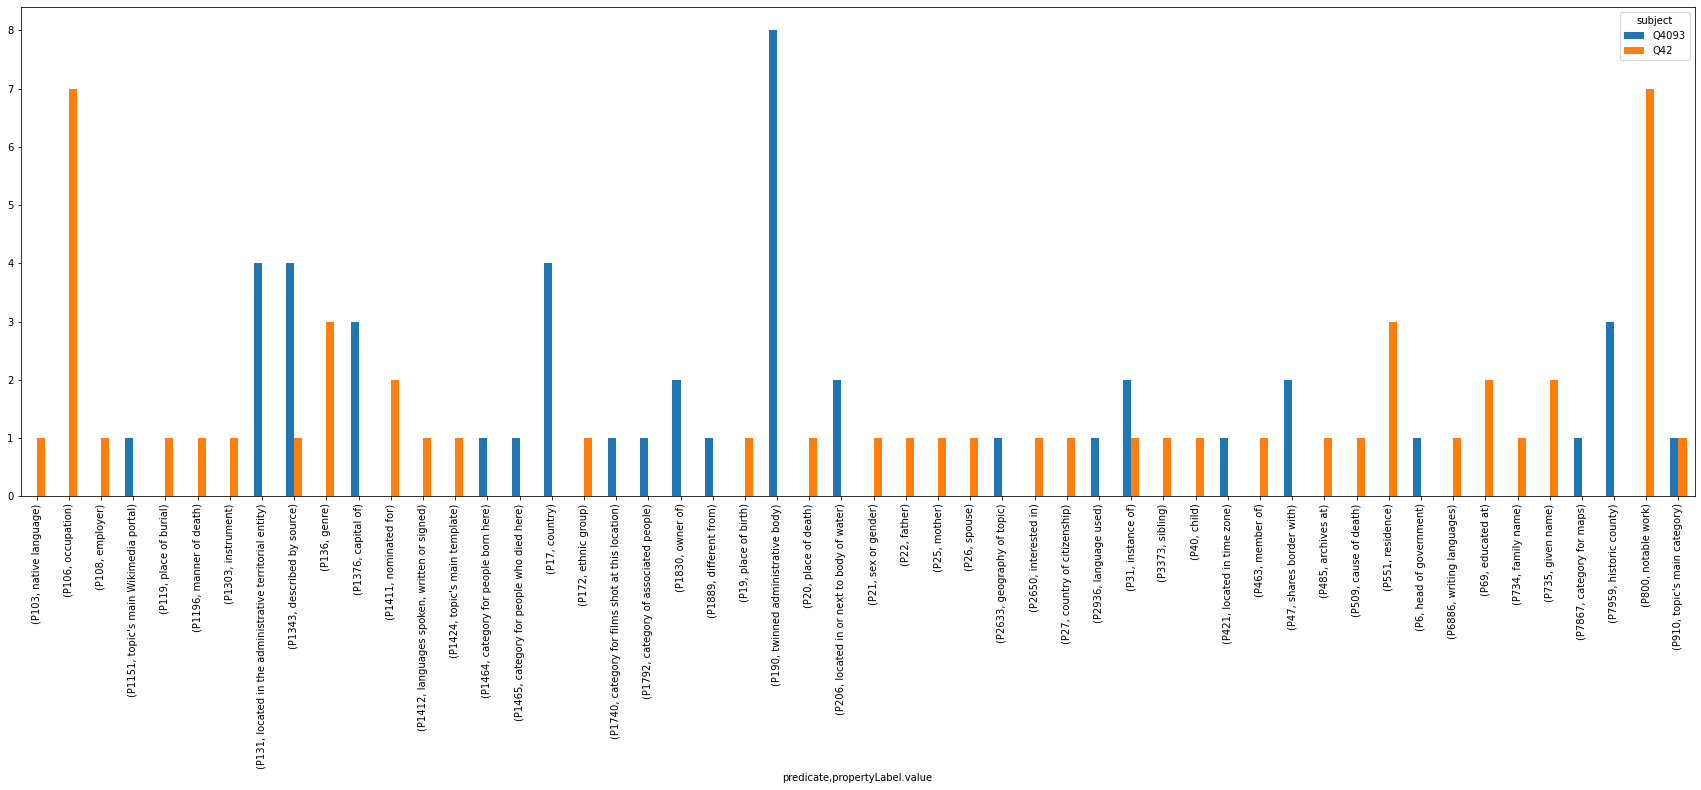

In [99]:
plot_distribution(get_entities_distribution(["Q4093", "Q42"]))